In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_dir = "./train_set/"
val_dir = "./val_set/"
test_dir = "./test_set/"

target_img_shape = (64, 64)

In [8]:
# data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2,
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

train_set = train_datagen.flow_from_directory(train_dir, target_size=target_img_shape, batch_size=32, class_mode='binary')

Found 2002 images belonging to 2 classes.


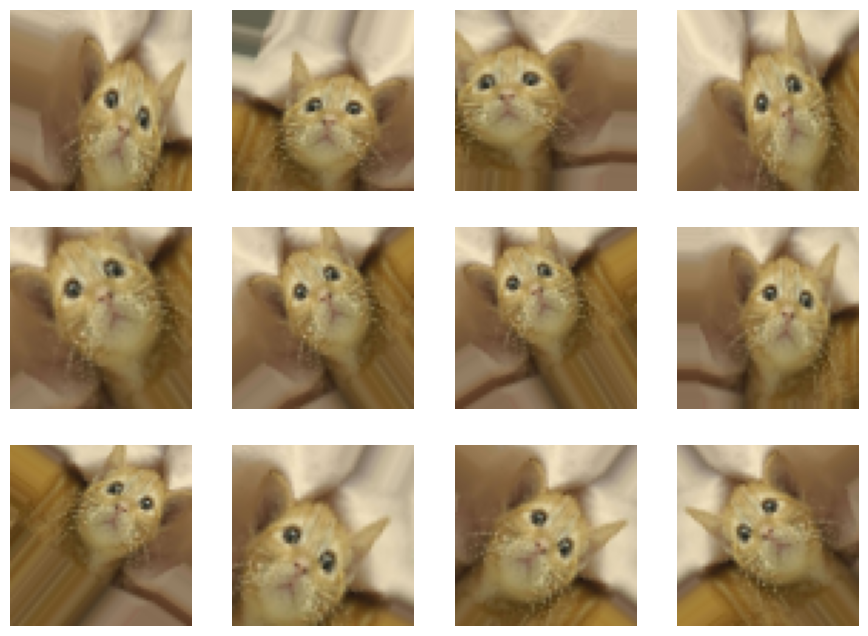

In [9]:
# vitualize the augmented images
nplots = 12

def visualize_augmented_images(images_arr):
    fig = plt.figure(figsize=(11,8))
    for j in range(nplots):
        plt.subplot(3,4,j+1)
        plt.imshow(images_arr[j])
        plt.axis('off')
    plt.show()


augmented_images = [train_set[0][0][0] for i in range(nplots)]
visualize_augmented_images(augmented_images)

In [10]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_set = val_datagen.flow_from_directory(val_dir, target_size=target_img_shape, batch_size=32, class_mode='binary')

Found 400 images belonging to 2 classes.


[0 1] [1001 1001]


<BarContainer object of 2 artists>

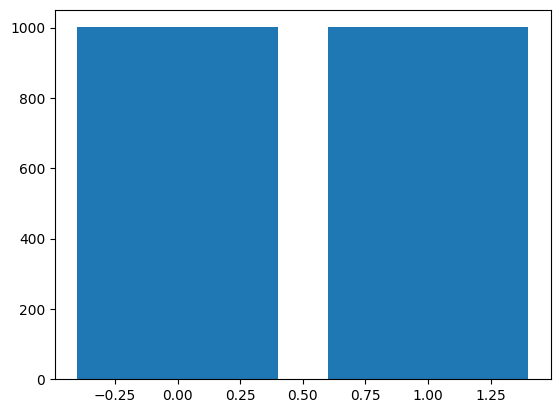

In [11]:
# visualize some images
ids, count = np.unique(train_set.classes, return_counts=True)
print(ids, count)
plt.bar(ids, count)

In [12]:
# train set
labels = (train_set.class_indices)
print(labels)

labels = dict((v,k) for k,v in labels.items())
print(labels)

for i in ids:
    print(labels[i], count[i])

{'cat': 0, 'dog': 1}
{0: 'cat', 1: 'dog'}
cat 1001
dog 1001


In [13]:
# validation set
ids, count = np.unique(val_set.classes, return_counts=True)
print(ids, count)


[0 1] [200 200]


In [14]:
for image_batch, label_batch in train_set:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (32, 64, 64, 3)
Label batch shape:  (32,)


In [15]:
# create model
input_shape = (target_img_shape[0], target_img_shape[1], 3)
print(input_shape)

(64, 64, 3)


In [16]:
# create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Conv2D layer with 32 filters, 3x3 kernel, relu activation function
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

# Conv2D layer with 64 filters, 3x3 kernel, relu activation function
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Conv2D layer with 128 filters, 3x3 kernel, relu activation function
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# flatten layer
model.add(Flatten())

# output layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [17]:
# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# fit model
history = model.fit(train_set, epochs=20, validation_data=val_set, validation_steps=len(val_set), verbose=1)

Epoch 1/20


2023-10-25 20:50:07.237352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-10-25 20:50:07.276653: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


63/63 [==============================] - ETA: 0s - loss: 0.6976 - accuracy: 0.4910

2023-10-25 20:50:11.483188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


63/63 [==============================] - 5s 71ms/step - loss: 0.6976 - accuracy: 0.4910 - val_loss: 0.6923 - val_accuracy: 0.5500
Epoch 2/20
63/63 [==============================] - 4s 69ms/step - loss: 0.6957 - accuracy: 0.5245 - val_loss: 0.6929 - val_accuracy: 0.5175
Epoch 3/20
63/63 [==============================] - 4s 65ms/step - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6909 - val_accuracy: 0.5150
Epoch 4/20
63/63 [==============================] - 4s 62ms/step - loss: 0.6903 - accuracy: 0.5435 - val_loss: 0.6776 - val_accuracy: 0.5350
Epoch 5/20
63/63 [==============================] - 4s 62ms/step - loss: 0.6802 - accuracy: 0.5769 - val_loss: 0.6731 - val_accuracy: 0.5100
Epoch 6/20
63/63 [==============================] - 4s 71ms/step - loss: 0.6589 - accuracy: 0.6074 - val_loss: 0.6719 - val_accuracy: 0.5375
Epoch 7/20
63/63 [==============================] - 5s 73ms/step - loss: 0.6433 - accuracy: 0.6274 - val_loss: 0.6730 - val_accuracy: 0.5950
Epoch 8/20
63/63 [======

In [19]:
# evaluate model
loss, accuracy = model.evaluate(val_set)

print("Loss: ", loss)
print("Accuracy: ", accuracy)


 3/13 [=====>........................] - ETA: 0s - loss: 0.5201 - accuracy: 0.7188

2023-10-25 20:51:34.109035: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


13/13 [==============================] - 1s 38ms/step - loss: 0.5515 - accuracy: 0.6900
Loss:  0.5514612793922424
Accuracy:  0.6899999976158142


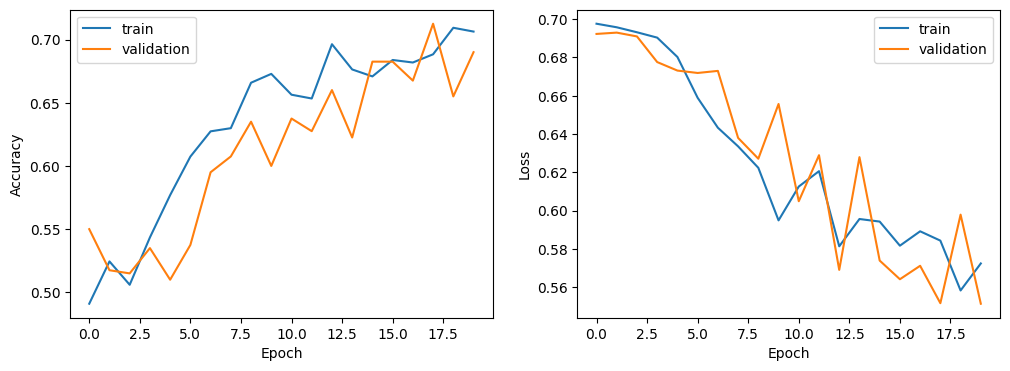

In [20]:
# plot accuracy and loss side by side
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


(64, 64, 3)


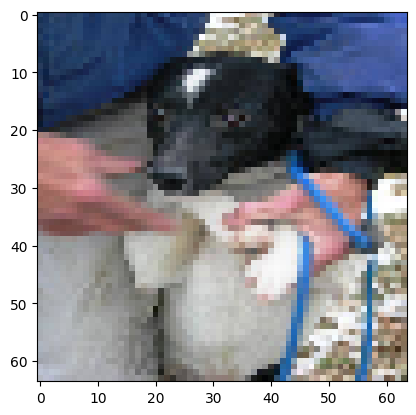

In [21]:
# predict on test set
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

target_img_shape = (64, 64)
test_image = load_img('./test_set/test_set/1.jpg', target_size=target_img_shape)
test_image = img_to_array(test_image)

# normalize
test_image = test_image / 255.0
print(test_image.shape)

# show image
plt.imshow(test_image)

In [22]:
# reshape to 4d
test_image = np.expand_dims(test_image, axis=0)
print(test_image.shape)

(1, 64, 64, 3)


In [23]:
# predict
result = model.predict(test_image)
print(result)

1/1 [==============================] - 0s 59ms/step
[[0.68038225]]


In [24]:
# get class
train_set.class_indices

{'cat': 0, 'dog': 1}

In [25]:
cls = "Dog" if result[0][0] > 0.5 else "Cat"
print(cls)

Dog


In [26]:
# predict from category function
def predict_from_category(path):
    test_image = load_img(path, target_size=target_img_shape)
    test_image = img_to_array(test_image)

    # normalize
    test_image = test_image / 255.0
    # print(test_image.shape)

    # show image
    # plt.imshow(test_image)

    # reshape to 4d
    test_image = np.expand_dims(test_image, axis=0)
    # print(test_image.shape)

    # predict
    result = model.predict(test_image)
    print(result)

    # get class
    train_set.class_indices

    cls = "Dog" if result[0][0] > 0.5 else "Cat"
   
    # return result and class
    return result, cls

1/1 [==============================] - 0s 14ms/step
[[0.36316893]]


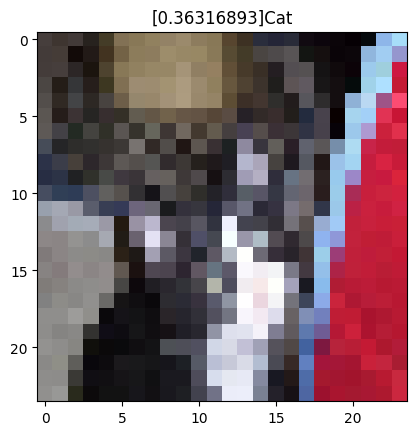

1/1 [==============================] - 0s 14ms/step
[[0.26077998]]


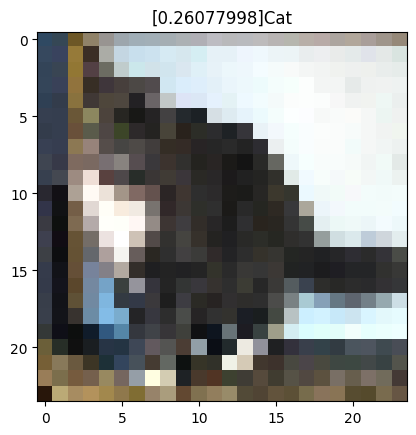

1/1 [==============================] - 0s 20ms/step
[[0.42825365]]


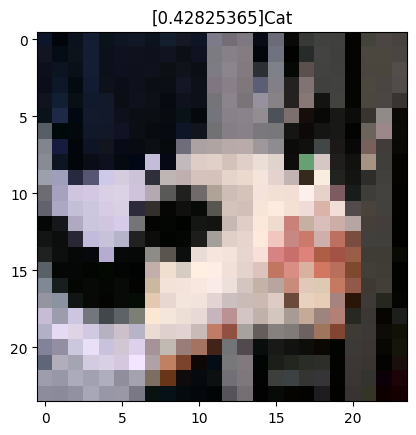

1/1 [==============================] - 0s 15ms/step
[[0.72776383]]


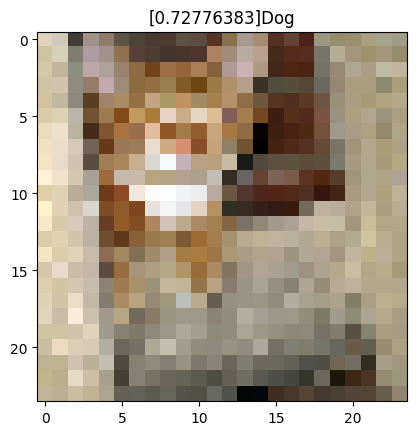

1/1 [==============================] - 0s 12ms/step
[[0.5894218]]


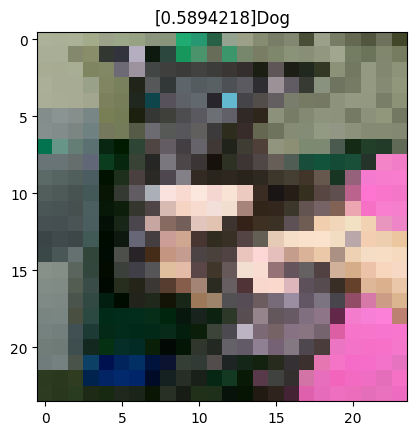

1/1 [==============================] - 0s 13ms/step
[[0.15495208]]


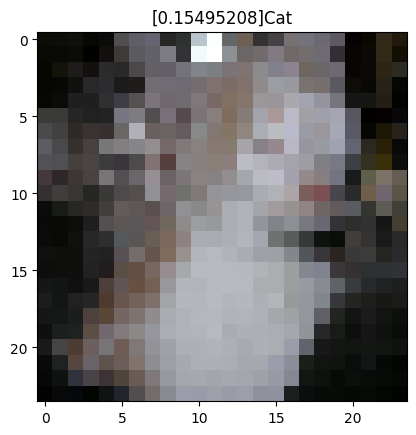

1/1 [==============================] - 0s 12ms/step
[[0.7008904]]


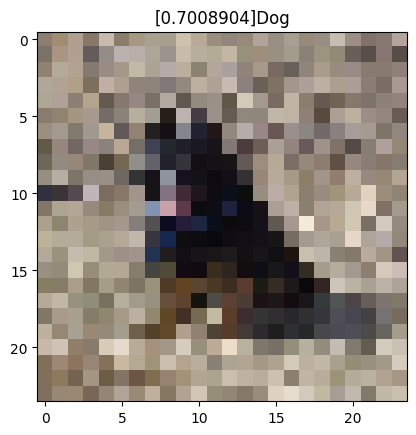

1/1 [==============================] - 0s 14ms/step
[[0.48564917]]


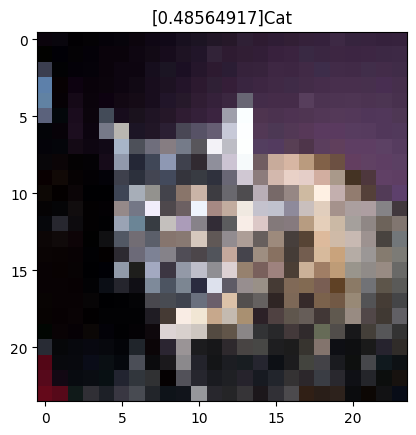

1/1 [==============================] - 0s 15ms/step
[[0.10313731]]


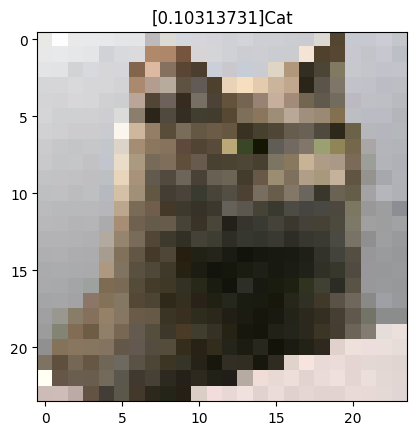

1/1 [==============================] - 0s 12ms/step
[[0.2792748]]


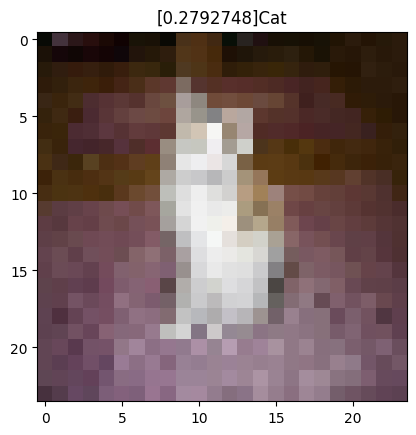

1/1 [==============================] - 0s 11ms/step
[[0.3455347]]


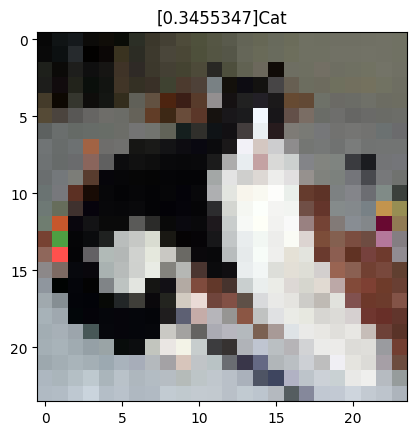

1/1 [==============================] - 0s 21ms/step
[[0.9608474]]


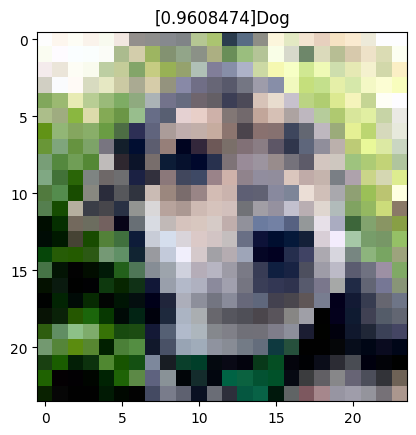

1/1 [==============================] - 0s 17ms/step
[[0.42593256]]


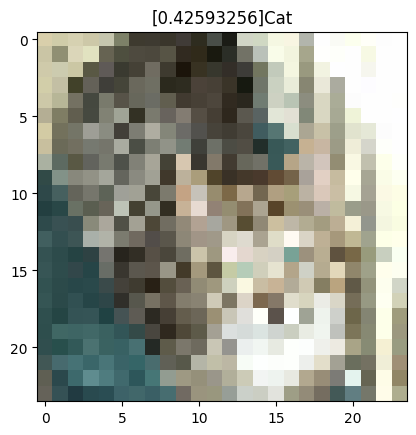

1/1 [==============================] - 0s 12ms/step
[[0.99641824]]


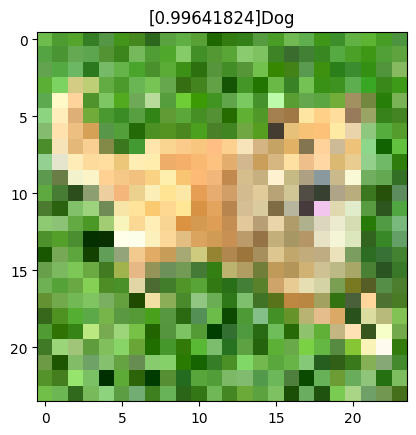

1/1 [==============================] - 0s 14ms/step
[[0.21622145]]


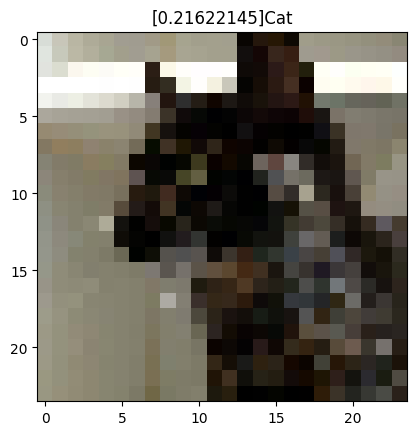

1/1 [==============================] - 0s 12ms/step
[[0.16071592]]


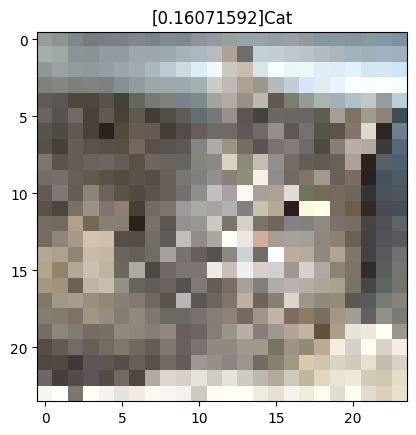

1/1 [==============================] - 0s 11ms/step
[[0.5537733]]


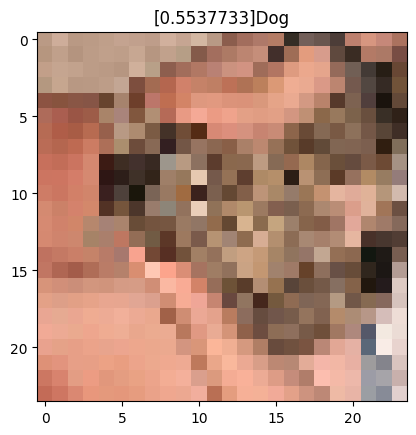

1/1 [==============================] - 0s 11ms/step
[[0.7602747]]


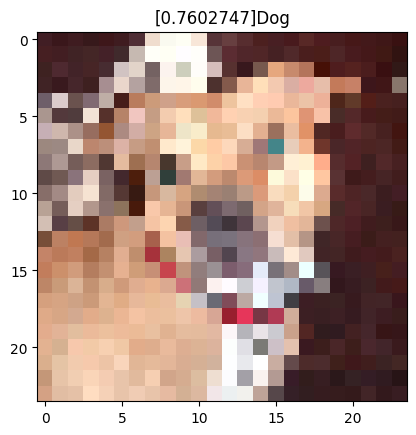

1/1 [==============================] - 0s 28ms/step
[[0.8110603]]


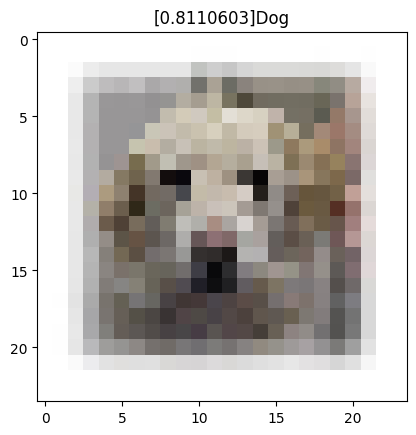

1/1 [==============================] - 0s 11ms/step
[[0.68038225]]


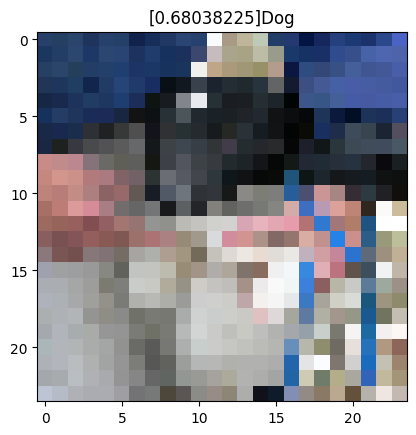

In [30]:
#  show image with prediction
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

test_dir = "./test_set/test_set/"


for file in os.listdir(test_dir):
    path = test_dir + file
    # print(path)
    result, cls = predict_from_category(path)
    # cls = predict_from_category(path)
    plt.title(str(result[0])+cls)
    plt.imshow(load_img(path, target_size=(24, 24)))
    plt.show()

# nplots = 12

# def visualize_predict_images(images_arr):
#     fig = plt.figure(figsize=(11,8))
#     for j in range(nplots):
#         plt.subplot(3,4,j+1)
#         plt.title(cls)
#         plt.imshow(images_arr[j])
#         plt.axis('off')
#     plt.show()


# augmented_images = [test_dir[0][0][0] for i in range(nplots)]
# visualize_predict_images(augmented_images)